<a href="https://colab.research.google.com/github/prgit21/K-Means/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline                #used for data virtualisation
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling.         
import numpy as np


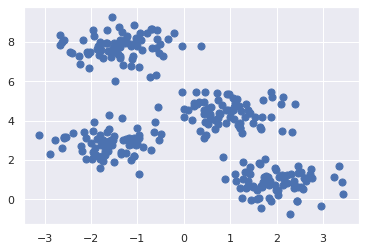

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,                #use sklearn to plot data scatter
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)                                  #K means needs number of clusters to be specified before hand. Clusters = 4(k =4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

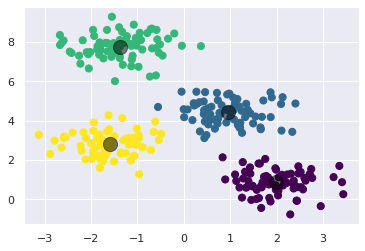

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_                                               #used to determine center of each cluster and plot it
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);         


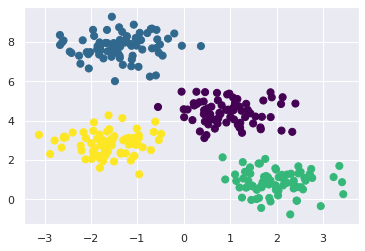

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
                                                                                # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
                                                                                # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
                                                                                # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
                                                                                # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
